# NLP Challenge

Objective: Determine if a given text was translated by a machine or a professional translator.

For this project I was given a dataset with translated texts. The texts were translated by either a machine or a human, and we must determine which is which. The dataset contains two columns: the label and the translated text. The label is either 0 or 1, where 0 means the text was translated by a machine and 1 means the text was translated by a human **(0 = Machine, 1 = Human)**.

## Data Exploration

We start by loading the data and checking the first few rows. The data is simply a txt file with the label and the text separated by a tab. After loading the data, we added column names for easier access and change the label type to integer.

From the data info, we can see that there are no missing values, and has a total of ~15,000 entries. I also printed the first 5 texts to get a sense of the data. The `df.head()` did not print the full text, so I printed the first 5 texts individually.

In [1]:
# Load dataset from txt file
import numpy as np
import pandas as pd


df = pd.read_csv('./data/TRAINING_DATA.txt', sep = '\t', header = None)
df.columns = ['label', 'text']
df['label'] = df['label'].astype('category')
df['label'] = df['label'].cat.codes

display(df.info())
display(df.head(5))

print("""********************************************

Printing first 5 texts, since df.head() does not display the full text
""")
print(df.values[:5,1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14924 entries, 0 to 14923
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   14924 non-null  int8  
 1   text    14924 non-null  object
dtypes: int8(1), object(1)
memory usage: 131.3+ KB


None

,label,text
0,1,"Cuando conocí a Janice en 2013 , una familia n..."
1,0,Hwang habló en Sur de este año por Southwest M...
2,1,Usted podría pensar Katy Perry y Robert Pattin...
3,1,Cualquiera que haya volado los cielos del crea...
4,1,"Bueno , este cantante tendrá un LARGO tiempo p..."


********************************************

Printing first 5 texts, since df.head() does not display the full text

['Cuando conocí a Janice en 2013 , una familia necesitaba 600 puntos , en promedio , para ser asignada a un apartamento del ayuntamiento de Camden .'
 'Hwang habló en Sur de este año por Southwest Music and Media Conference sobre el tema de " videos caseros-lanzallamas " en YouTube .'
 'Usted podría pensar Katy Perry y Robert Pattinson reencontrándose en Coachella es una gran noticia , ¡ hasta que es coronado por quién se toparon !'
 'Cualquiera que haya volado los cielos del creador ha escuchado todo el acto del prevuelo con la información de seguridad hasta ahora , pero esta empleada ha volteado el guión un poco !'
 'Bueno , este cantante tendrá un LARGO tiempo para sentir aún más remordimiento en estos próximos años !']


Now we will do a simple visualization to see the distribution of the labels. We can see that the dataset is balanced, with ~50% of the texts translated by a machine and ~50% by a human.

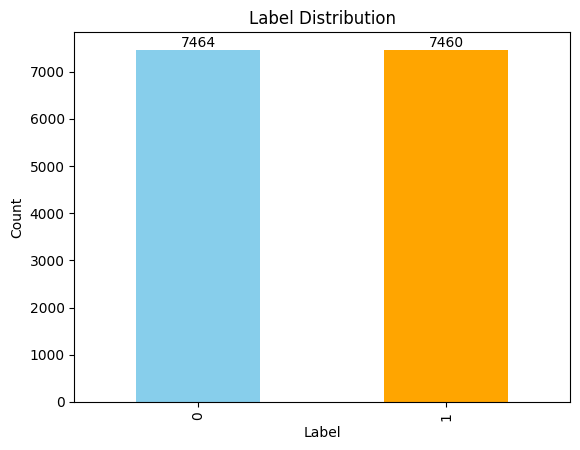

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot label distribution
df.label.value_counts().plot(kind='bar', color = ['skyblue', 'orange'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')

# add count above the bar
for i in range(len(df.label.value_counts())):
    plt.text(i, df.label.value_counts()[i], df.label.value_counts()[i], ha = 'center', va = 'bottom')

plt.show()

## Data Preprocessing

To continue with the data preprocessing, we will simply check that there are no tags (like html, css, or other encodings) in the text. Characters like commas and periods will not be removed, and the text will not be changed to lowercase, as it may affect the model's performance. We will use a function in `nlp_utils.py` to remove any tags from the text.

Here is the code to remove tags from the text:

>    ```python
>    import re
>    from bs4 import BeautifulSoup
>    def clean_text(text):
>        text = re.sub(r'<(script|style).*?>.*?</\1>', '', text, flags=re.DOTALL)    # Step 1: Remove inline JavaScript/CSS
>
>        text = re.sub(r'<!--.*?-->', '', text, flags=re.DOTALL)  # Step 2: Remove HTML comments
>
>        soup = BeautifulSoup(text, 'html.parser')   # Step 3: Remove remaining HTML tags using BeautifulSoup
>        text = soup.get_text(separator=' ')  # Extract text and separate with spaces
>        
>        text = re.sub(r'=[0-9A-Fa-f]{2}', ' ', text)     # Step 4: General regex to remove any encodings like =XX (two hexadecimal digits)
>
>        text = re.sub(r'\s+', ' ', text).strip()        # Step 5: Remove extra whitespace
>
>        text = text.lstrip('b')     # Remove prefixed 'b'
>        
>        text = re.sub(r'\s+', ' ', text) # Remove any extra spaces again, just to be sure
>
>        return text
>    ```

In [3]:
from nlp_utils import clean_text

# clean text
df['cleaned_text'] = df['text'].apply(clean_text)
df.head(5)

/content/nlp_utils.py:12: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


,label,text,cleaned_text
0,1,"Cuando conocí a Janice en 2013 , una familia n...","Cuando conocí a Janice en 2013 , una familia n..."
1,0,Hwang habló en Sur de este año por Southwest M...,Hwang habló en Sur de este año por Southwest M...
2,1,Usted podría pensar Katy Perry y Robert Pattin...,Usted podría pensar Katy Perry y Robert Pattin...
3,1,Cualquiera que haya volado los cielos del crea...,Cualquiera que haya volado los cielos del crea...
4,1,"Bueno , este cantante tendrá un LARGO tiempo p...","Bueno , este cantante tendrá un LARGO tiempo p..."


The rest of the project is in [this other notebook](distilbert%20no%20extra%20head.ipynb)